In [3]:
# Import required libraries
import os
import requests
import json
import pandas as pd
# Import hvplot.pandas
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import datetime
import numpy as np
import numpy.random as rnd
import requests
from MCForecastTools import MCSimulation
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline

In [4]:
# Load the environment variables from the .env file
# Call the load_dotenv function
load_dotenv()

True

In [49]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
            alpaca_api_key,
            alpaca_secret_key,
            api_version = "v2")

In [50]:
# Can allow user defined with IPY Widgets 
# widgets.Dropdown(options=["AGG", "SPY", "XLF", "QQQ", "EEM", "XLE", "GDX", "IWM", "IWV"], description="Select ETF")

# Not sure how to allow for multiple choices

In [51]:
timeframe = "1D"

today = str(datetime.datetime.today()).split()[0]

three_years_ago= str(datetime.datetime.today()- datetime.timedelta(days=1095)).split()[0]

start_date= pd.Timestamp(three_years_ago, tz="America/New_York").isoformat()

end_date= pd.Timestamp(today, tz="America/New_York").isoformat()
                       
limit_rows=1000
# Can allow user defined with IPY Widgets above 
tickers=["AGG", "SPY", "XLF", "QQQ", "EEM", "XLE", "GDX", "IWM", "IWV"]

In [52]:
print("Preparing 3 years of historical data... Please wait")
alpaca_df= alpaca.get_barset(
               tickers,
               timeframe,
               limit= limit_rows,
               start = start_date,
               end = end_date
).df
display(alpaca_df.head())
display(alpaca_df.tail())

Preparing 3 years of historical data... Please wait


AGG                                       EEM  \
                             open     high     low    close   volume   open   
time                                                                          
2018-08-16 00:00:00-04:00  106.38  106.420  106.24  106.390  2135827  41.92   
2018-08-17 00:00:00-04:00  106.43  106.545  106.38  106.460  1915186  41.62   
2018-08-20 00:00:00-04:00  106.59  106.680  106.53  106.650  2105513  42.31   
2018-08-21 00:00:00-04:00  106.58  106.620  106.51  106.575  2596721  42.83   
2018-08-22 00:00:00-04:00  106.66  106.710  106.57  106.660  1725557  42.98   

                                                            ...    XLE  \
                            high    low  close      volume  ...   open   
time                                                        ...          
2018-08-16 00:00:00-04:00  42.11  41.75  41.77  66452493.0  ...  72.26   
2018-08-17 00:00:00-04:00  42.31  41.52  42.21  63827483.0  ...  72.62   
2018-08-20 00:00:00-04:00  42.44  42.17  42.40  45200529.0  ...  72.63   
2018-08-21 00:00:00-04:00  43.11  42.80  42.93  63760470.0  ...  73.71   
2018-08-22 00:00:00-04:00  43.35  42.98  43.27  42685647.0  ...  73.93   

                                                               XLF          \
                             high      low  close    volume   open    high   
time                                                                         
2018-08-16 00:00:00-04:00  72.840  72.2200  72.43  12322849  27.87  28.190   
2018-08-17 00:00:00-04:00  72.800  72.3450  72.63   9295197  28.04  28.210   
2018-08-20 00:00:00-04:00  73.355  72.6000  73.11   7192157  28.17  28.310   
2018-08-21 00:00:00-04:00  74.060  73.3899  73.48   8606791  28.28  28.510   
2018-08-22 00:00:00-04:00  74.585  73.8800  74.36   8265854  28.25  28.376   

                                                   
                             low  close    volume  
time                                               
2018-08-16 00:00:00-04:00  27.87  28.10  40984808  
2018-08-17 00:00:00-04:00  28.03  28.16  36517847  
2018-08-20 00:00:00-04:00  28.13  28.25  25473384  
2018-08-21 00:00:00-04:00  28.22  28.36  42877193  
2018-08-22 00:00:00-04:00  28.23  28.29  24460821  

[5 rows x 45 columns]

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2021-08-09 00:00:00-04:00  115.89  115.9600  115.5800  115.59  5003990   
2021-08-10 00:00:00-04:00  115.65  115.6500  115.4350  115.44  6692325   
2021-08-11 00:00:00-04:00  115.46  115.7000  115.3400  115.55  6423130   
2021-08-12 00:00:00-04:00  115.49  115.5799  115.4000  115.54  4248390   
2021-08-13 00:00:00-04:00  115.65  115.9700  115.6401  115.97  4455924   

                              EEM                                    ...  \
                             open   high     low  close      volume  ...   
time                                                                 ...   
2021-08-09 00:00:00-04:00  52.165  52.30  52.050  52.12  18010347.0  ...   
2021-08-10 00:00:00-04:00  52.330  52.36  52.105  52.21  13352348.0  ...   
2021-08-11 00:00:00-04:00  52.500  52.50  52.085  52.33  19908212.0  ...   
2021-08-12 00:00:00-04:00  51.880  51.90  51.650  51.85  22966118.0  ...   
2021-08-13 00:00:00-04:00  51.640  51.73  51.390  51.72  25863365.0  ...   

                             XLE                                    XLF  \
                            open    high    low  close    volume   open   
time                                                                      
2021-08-09 00:00:00-04:00  48.79  49.200  48.48  48.82  20123717  37.81   
2021-08-10 00:00:00-04:00  49.05  49.800  49.01  49.66  25985934  37.93   
2021-08-11 00:00:00-04:00  49.54  50.145  49.23  50.05  23343320  38.47   
2021-08-12 00:00:00-04:00  50.02  50.290  49.40  50.01  16281505  38.84   
2021-08-13 00:00:00-04:00  50.04  50.040  49.30  49.37  15105614  38.90   

                                                             
                              high     low  close    volume  
time                                                         
2021-08-09 00:00:00-04:00  38.1350  37.600  37.97  44764583  
2021-08-10 00:00:00-04:00  38.4700  37.885  38.36  39531632  
2021-08-11 00:00:00-04:00  38.8099  38.290  38.80  46109872  
2021-08-12 00:00:00-04:00  38.9200  38.600  38.86  39521426  
2021-08-13 00:00:00-04:00  38.9500  38.490  38.58  36123004  

[5 rows x 45 columns]

In [53]:
# Set number of simulations
# Use IPY Widgets to set sims and years
#int_slider = widgets.IntSlider(min=50, max=500, value=25, step=10, description="Simulations?")
#int_slider

In [54]:
#simulations = int_slider.value
#print(simulations)

In [55]:
#int_slider = widgets.IntSlider(min=1, max=10, value=25, step=1, description="Years?")
#int_slider

In [56]:
#years = int_slider.value
#print(years)

In [57]:
# set number of years and simulations
simulations = 50
years = 10

MC_ETF = MCSimulation(
    portfolio_data = alpaca_df,
    num_simulation = simulations,
    num_trading_days = 252 * years
)

In [58]:
# Run Monte Carlo simulations to forecast one year daily returns
MC_ETF.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997034,1.001656,1.002086,1.003682,0.994571,1.009800,1.004981,0.998833,1.005484,1.005027,...,0.998606,0.994582,1.006887,1.002363,1.000499,0.999988,1.005510,1.002157,1.000928,1.001690
2,0.987368,0.985622,1.000016,0.993514,0.986712,1.012253,0.993446,0.997500,1.010933,1.008535,...,1.012471,0.997962,1.004362,1.004738,1.002435,0.983518,1.013516,1.009170,1.003505,0.996826
3,0.984782,0.993801,0.996169,0.991052,0.989080,1.015245,0.992538,0.992127,1.014511,1.016627,...,1.019101,0.997968,0.998513,0.996592,1.004897,0.987193,1.019054,1.008724,1.010524,0.983490
4,0.986919,1.003103,1.000469,0.998931,0.980116,1.018809,0.982088,0.992833,1.007908,1.019369,...,1.017312,0.997366,1.006615,0.994096,1.006375,0.995170,1.026853,1.012174,1.009608,0.979509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.182936,2.715023,3.719778,5.933346,3.286508,3.830189,4.673899,3.671870,3.031948,4.201304,...,4.387482,4.489115,2.607686,5.886678,3.996085,3.098841,2.571584,5.745174,4.323496,6.167706
2517,4.162542,2.716203,3.757325,5.892235,3.288710,3.848571,4.664918,3.657605,3.011980,4.188706,...,4.379617,4.473028,2.601289,5.904550,4.031893,3.131157,2.576133,5.779161,4.323865,6.182386
2518,4.209240,2.708742,3.786368,5.943138,3.291571,3.832206,4.625891,3.646868,3.043614,4.183795,...,4.367824,4.512925,2.596511,5.885401,3.976821,3.146725,2.567647,5.742315,4.288878,6.195086
2519,4.239336,2.680670,3.814447,5.944414,3.292925,3.833184,4.672948,3.643900,3.050792,4.220947,...,4.361481,4.533880,2.577013,5.890843,3.963211,3.158621,2.545409,5.798331,4.258012,6.200327


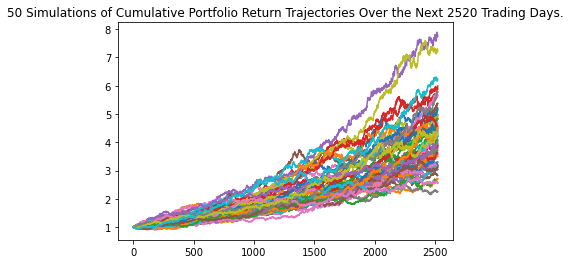

In [59]:
# Plot simulation outcomes
line_plot = MC_ETF.plot_simulation()

In [60]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_ETF.simulated_return.mean(axis=1)),
    "median": list(MC_ETF.simulated_return.median(axis=1)),
    "min": list(MC_ETF.simulated_return.min(axis=1)),
    "max": list(MC_ETF.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.001264,1.001315,0.991495,1.010074
2,1.002153,1.003572,0.983518,1.023662
3,1.002615,1.004072,0.983490,1.021462
4,1.003327,1.005973,0.979509,1.026853
...,...,...,...,...
2516,4.201935,4.064327,2.249225,7.752404
2517,4.211508,4.103691,2.247234,7.730197
2518,4.205762,4.097859,2.245448,7.726578
2519,4.207139,4.089836,2.254533,7.733120


<AxesSubplot:title={'center':'Simulated Daily Returns Behavior of ETF Portfolio Over the Next Year'}>

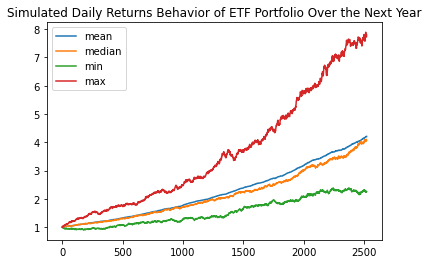

In [61]:
# Use the `plot` function to visually analyze the trajectory of AAPL stock daily returns on a 252 trading day simulation
df_simulated_returns.plot(title="Simulated Daily Returns Behavior of ETF Portfolio Over the Next Year")

In [62]:
# Set initial investment
# Use widget to set investment amount
# widgets.Textarea(value="Please enter text here..")

Textarea(value='Please enter text here..')

In [64]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10012.642175,10013.153766,9914.954926,10100.741398
2,10021.532852,10035.720002,9835.183287,10236.624127
3,10026.150760,10040.720168,9834.899559,10214.624753
4,10033.270614,10059.734579,9795.085921,10268.526854
...,...,...,...,...
2516,42019.353824,40643.273998,22492.249829,77524.035408
2517,42115.077212,41036.908600,22472.338076,77301.971820
2518,42057.620841,40978.593489,22454.475030,77265.784078
2519,42071.393664,40898.363538,22545.333709,77331.200541


<AxesSubplot:title={'center':'Simulated Outcomes Behavior of ETF Stock Over the Next Year'}>

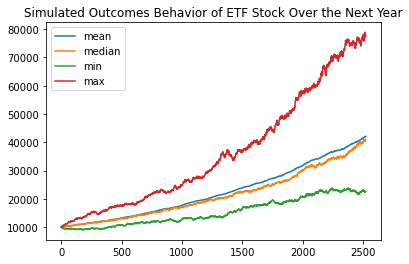

In [65]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl.plot(title="Simulated Outcomes Behavior of ETF Stock Over the Next Year")

In [66]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_ETF.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           50.000000
mean             4.205660
std              1.183119
min              2.261252
25%              3.218370
50%              4.070258
75%              4.826991
max              7.793823
95% CI Lower     2.564030
95% CI Upper     6.983732
Name: 2520, dtype: float64


In [67]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in ETF portfolio
# Bridge back to Widget for initial investment
ci_lower = tbl[8]*10000
ci_upper = tbl[9]*10000

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}.")

There is a 95% chance that an initial investment of $10,000.00 in the portfolio over the next year will end within in the range of $25,640.30 and $69,837.32.
